In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
#import warnings
#warnings.filterwarnings("ignore")

QUESTION 3

In [2]:
# Extracting diabet dataset
diabet_df = pd.read_excel('Diabetes_Data.xlsx')

Q3.1

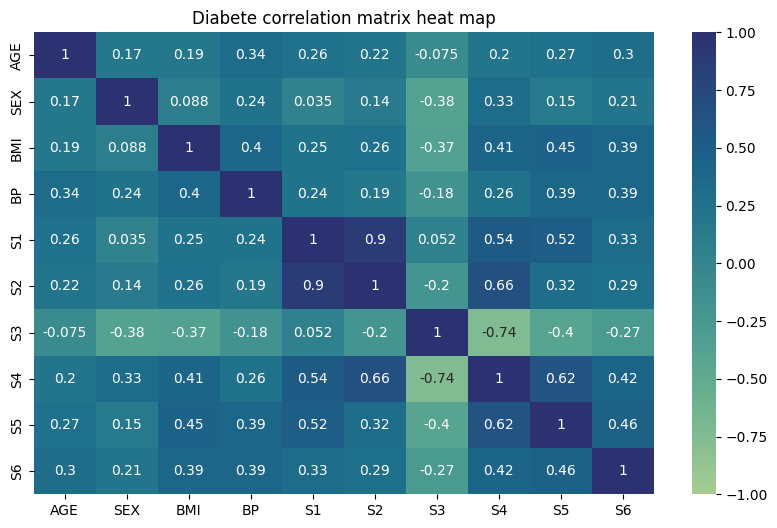

In [3]:
"""Producing correlation matrix of diabet dataset"""
variable_df = diabet_df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]    #Extraacting the column except dependent variable Y
variable_corr = variable_df.corr()                          # Calculating correlation 
# plot the heat map of diabate correlation matrix
plt.figure(figsize = (10, 6))
heat =sns.heatmap(variable_corr, annot = True, cmap = "crest", vmin = -1, vmax = 1)
plt.title('Diabete correlation matrix heat map')
plt.show()

Q3.2

In [4]:
"""Checking for collinearity between Predictors on diabet dataset"""
X = diabet_df.iloc[:, :-1]    #extracting independent column data
y = diabet_df.iloc[:, -1]      # Extracting depend column data
X = sm.add_constant(X)         
model = sm.OLS(y, X)
result = model.fit()
Vif_df = pd.DataFrame()
Vif_df['Variable(Predictor)'] = X.columns 
Vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(Vif_df)
result.summary()

,Variable(Predictor),VIF
0,const,685.773603
1,AGE,1.217307
2,SEX,1.278071
3,BMI,1.509437
4,BP,1.459428
5,S1,59.202510
6,S2,39.193370
7,S3,15.402156
8,S4,8.890986
9,S5,10.075967


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                        23:05:13   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE           -0.0364      0.217     -0.168      0.867      -0.463       0.390
SEX          -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI            5.6030      0.717      7.813      0.000       4.194       7.012
BP             1.1168      0.225      4.958      0.000       0.674       1.560
S1            -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2             0.7465      0.531      1.406      0.160      -0.297       1.790
S3             0.3720      0.782      0.475      0.635      -1.166       1.910
S4             6.5338      5.959      1.097      0.273      -5.178      18.245
S5            68.4831     15.670      4.370      0.000      37.685      99.282
S6             0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q3.3)

In [5]:
"""Creating  multivariate linear model to determine  Mean squared error """
# Calling Independent variable 'X' and dependent variable 'y' declared in Q3.2
model1 = sm.OLS(y,X)                          # regression model between dependent and independent variable
Result = model1.fit()                         # fitting the model
y_pred = Result.predict(X)
Mean_error = ((y - y_pred)**2).mean()                # calculationg mean error
adj_r2 = Result.rsquared_adj
print(f'The Mean Square Error: {Mean_error}\n')
print(f'Adjusted R-squared for model1: {adj_r2}\n')
print(Result.summary())

The Mean Square Error: 2859.6963475867506

Adjusted R-squared for model1: 0.5065592904853231

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                        23:05:13   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Q3.5)

In [6]:
"""Performing Stepwise and finding the Mean square error and R-squared usinf forward selection"""
X_var = X
y_var = y
def forward_regression(X_var, y_var, alpha, verbose=False):
    predictor = []
    
    while True:
        changes = False
        Eliminate = list(set(X_var.columns) - set(predictor))
        gen_p = pd.Series(index = Eliminate)
        
        for New_column in Eliminate:
            Model = sm.OLS(y_var, sm.add_constant(pd.DataFrame(X_var[predictor + [New_column]]))).fit()
            gen_p[New_column] = Model.pvalues[New_column]
        
        best_p_value = gen_p.min()
        
        if best_p_value < alpha:
            best_feature = gen_p.idxmin()
            predictor.append(best_feature)
            changes = True
            if verbose:
                print(f'The selected variable: {best_feature} ---> {best_p_value}\n')
        
        if not changes:
            break
    
    return predictor

selected_feature = forward_regression(X_var, y_var, alpha = 0.05, verbose=True)
print(f'\nThe Selected Features: {selected_feature}\n')

# Now you can create a new model using the selected variables and calculate MSE and R-squared
X_selected = X_var[selected_feature]
X_selected = sm.add_constant(X_selected)
Model_fit = sm.OLS(y_var, X_selected).fit()
Mean_Error = ((y_var - Model_fit.predict(X_selected)) ** 2).mean()
r_squared = Model_fit.rsquared
print(f'\nMean Squared Error (MSE) for the new model: {Mean_Error}\n')
print(f'R-squared (R^2) for the new model: {r_squared}\n')
print(Model_fit.summary())


The selected variable: const ---> 2.404714164945241e-154

The selected variable: BMI ---> 3.4660064451673995e-42

The selected variable: S5 ---> 3.0396348492618457e-20

The selected variable: BP ---> 3.742619620837897e-05

The selected variable: S1 ---> 0.0014544305422726858

The selected variable: SEX ---> 0.009230559696370681

The selected variable: S2 ---> 0.00027230239927345684


The Selected Features: ['const', 'BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


Mean Squared Error (MSE) for the new model: 2876.683251787016

R-squared (R^2) for the new model: 0.5148837959256445

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.01e-65
Time:                      

QUESTION 4

In [7]:
"""Loading Titanic dataset and Anlyzing"""
Titanic_df = pd.read_csv('titanic3.csv')

Q4.2)

In [8]:
# Determining the probability of survival in titanic
pass_count= len(Titanic_df)   # Defining the lenght of total passenger in titanic
survivor_total = Titanic_df["survived"].sum()      # total survival 

probability = survivor_total / pass_count  # calculating the probability of accident survivors
print(f'The Probability of passenger survival on Titanic:{ probability}\n')


The Probability of passenger survival on Titanic:0.3819709702062643



Q4.3)

In [9]:
#  Generating table broken down by passenger class, sex and age

pclass_probabilities = {}
for pclass in [1, 2, 3]:
    subset = Titanic_df[Titanic_df['pclass'] == pclass]
    pclass_probabilities[f'Pclass {pclass}'] = subset['survived'].mean()

# Calculate the probability of survival for sex
sex_probabilities = {}
for sex in ['male', 'female']:
    subset = Titanic_df[Titanic_df['sex'] == sex]
    sex_probabilities[sex] = subset['survived'].mean()

# Combine all the probabilities into a single DataFrame
probability_data = {
    'Category': list(pclass_probabilities.keys()) + list(sex_probabilities.keys()),
    'Probability of Survival': list(pclass_probabilities.values()) + list(sex_probabilities.values())
}

probability_table = pd.DataFrame(probability_data)

# Display the resulting table
print(probability_table)


   Category  Probability of Survival
0  Pclass 1                 0.619195
1  Pclass 2                 0.429603
2  Pclass 3                 0.255289
3      male                 0.190985
4    female                 0.727468


Parameter Estimates:
pclass: -1.0515340179630286
sex_male: -1.233599009013706
sex_female: 1.2335966864018313
age: -0.03163907334508645
Intercept: 3.0714412495546
Accuracy: 0.7853323147440795
Precision: 0.7354838709677419
Recall: 0.684
F1-score: 0.7088082901554404
Confusion Matrix:
[[686 123]
 [158 342]]


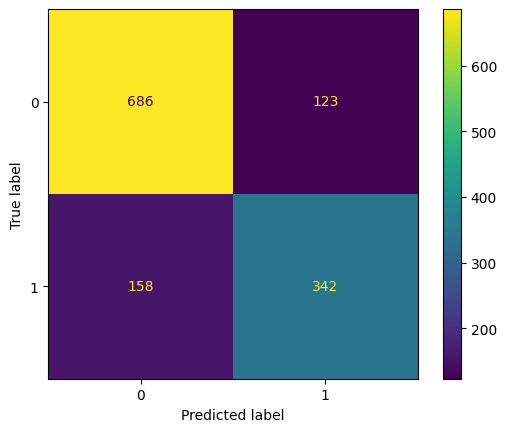

In [17]:
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#

# Handling the missing values in 'age' by replacing with the mean age
Titanic_df['age'].fillna(Titanic_df['age'].mean(), inplace=True)

# One-hot encoding for the 'sex' variable
sex_dummies = pd.get_dummies(Titanic_df['sex'], prefix='sex')
Titanic_df = pd.concat([Titanic_df, sex_dummies], axis=1)

# Define features (X) and the target variable (y)
X = Titanic_df[['pclass', 'sex_male', 'sex_female', 'age']]
y = Titanic_df['survived']

# Logistic regression model creation
model = LogisticRegression()
model.fit(X, y)

# Predict on the same dataset
y_predict = model.predict(X)

# Get the estimated coefficients (parameters) of the model
coefficients = model.coef_
intercept = model.intercept_

# Display the parameter estimates
print("Parameter Estimates:")
for feature, coefficient in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coefficient}")
print(f"Intercept: {intercept[0]}")

# Calculate evaluation metrics
accuracy = accuracy_score(y, y_predict)
precision = precision_score(y, y_predict)
recall = recall_score(y, y_predict)
f1 = f1_score(y, y_predict)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Display the confusion matrix
confusion_matrix_display = confusion_matrix(y, y_predict)
print("Confusion Matrix:")
print(confusion_matrix_display)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_display)
disp.plot()
plt.show()

In [25]:
# Using  the confusion matrix top calculare the classification accuracy
confusion_matrix_result = confusion_matrix(y, y_predict)

# Extract the true positives, true negatives, false positives, and false negatives
True_n, False_p, False_n, True_p = confusion_matrix_result.ravel()

# Calculate the classification accuracy
classification_accuracy = (True_p + True_n) / (True_p + True_n + False_p + False_n)

print("Classification Accuracy:", classification_accuracy)


Classification Accuracy: 0.7853323147440795
